# Visualizing The Fitting Parameters
We needed some sort of a metric to distinguish between the intensity v SDD curves for different model parameter combinations. The obvious choice was MSE. But MSE does not preserve any sense of the shape of the curve. Common metrics would be Frechet Distance(A person walking a dog, the trajectories of both are the curves, the max leash length), Hausdorf distance(The max. distance between any two points of both curves).  

None of those seemed useful for our case. Perhaps the best metric might be the fitting params. In this notebook, we explore how these fitting params change with different model parameters and if it truely is a good distance metric.  
(Beware, the data fitting is slow)

In [9]:
import seaborn as sns
from inverse_modelling_tfo.data import generate_data_loaders, normalize_zero_mean, get_interpolate_fit_params
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd


# Load Data
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/test_data.pkl')
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/intensity_summed_sim_data.pkl')
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/intensity_averaged_sim_data.pkl')
print(len(data))    # Length sanity check
fitting_param_table = get_interpolate_fit_params(data, weights=[1, 0.5])
print(len(fitting_param_table))    # Length sanity check
# data = normalize_zero_mean(data)
data.head(10)

228000
11400


,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Mu_a,Fetal Mu_a
0,10,0.654021,2.0,6.0,8.0,0.005,0.05
1,15,0.333228,2.0,6.0,8.0,0.005,0.05
2,19,0.142165,2.0,6.0,8.0,0.005,0.05
3,24,0.051027,2.0,6.0,8.0,0.005,0.05
4,29,0.016049,2.0,6.0,8.0,0.005,0.05
5,34,0.004872,2.0,6.0,8.0,0.005,0.05
6,38,0.001299,2.0,6.0,8.0,0.005,0.05
7,43,0.000360,2.0,6.0,8.0,0.005,0.05
8,48,0.000097,2.0,6.0,8.0,0.005,0.05
9,53,0.000027,2.0,6.0,8.0,0.005,0.05


In [10]:
parameter_names = ['Maternal Mu_a', 'Fetal Mu_a', 'Maternal Wall Thickness', 'Uterus Thickness']
for parameter in parameter_names:
    print(parameter, ' unique values ', pd.unique(data[parameter]))

Maternal Mu_a  unique values  [0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095]
Fetal Mu_a  unique values  [0.05  0.055 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095]
Maternal Wall Thickness  unique values  [ 8. 32. 26. 16. 30. 14. 18.  6. 36. 10. 12.  2. 38. 20.  4. 22. 28. 24.
 34.]
Uterus Thickness  unique values  [6. 5. 7.]


# Changes in Fitting Parameter with Degrees of Freedom(Wavelength 1)

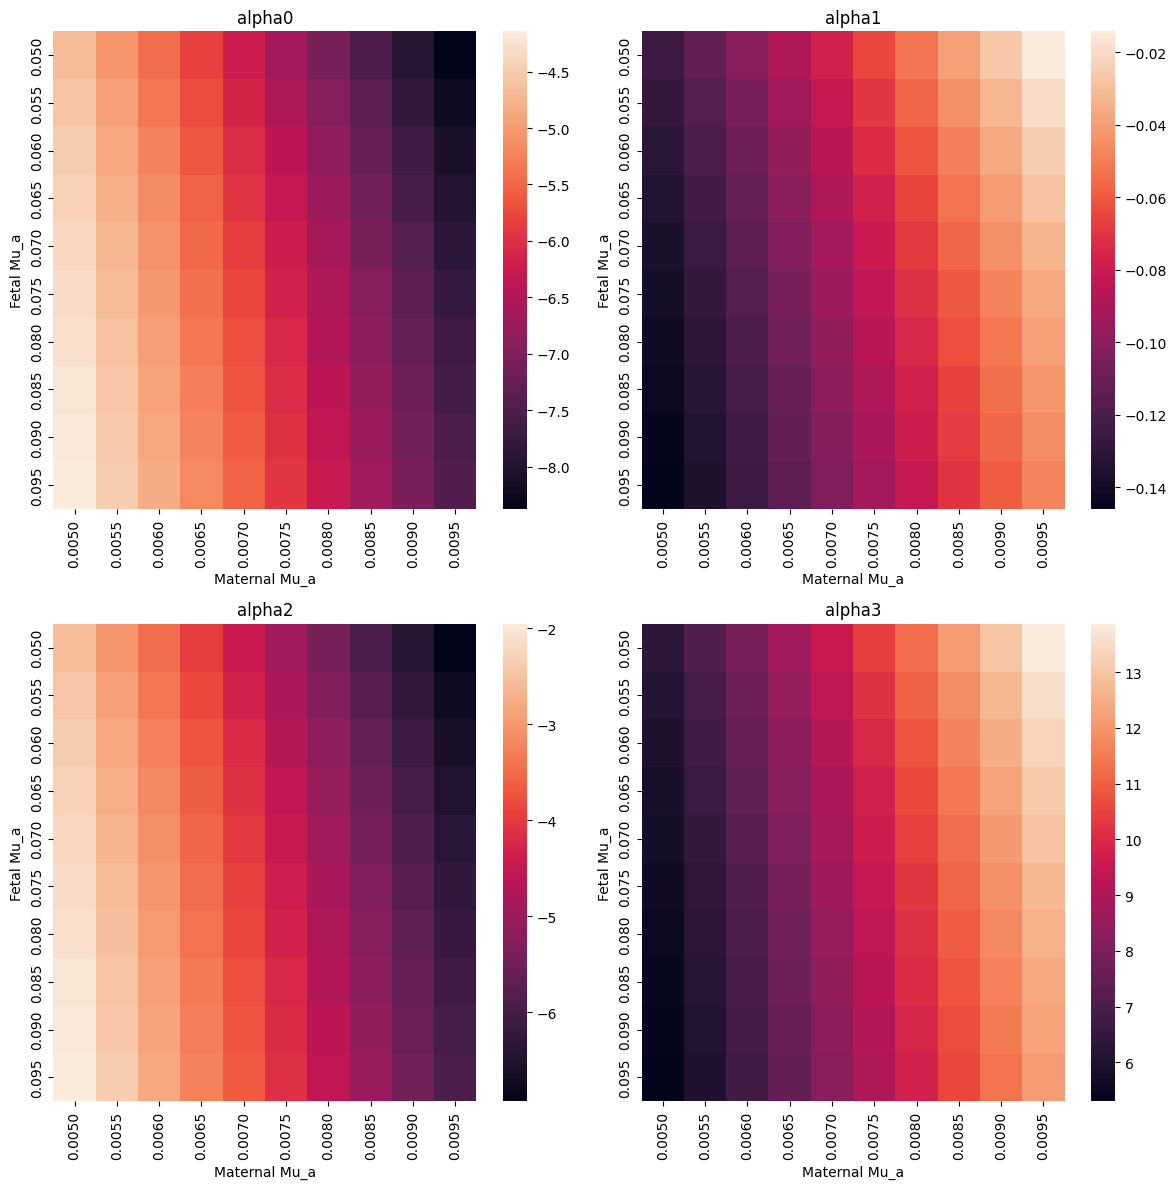

In [11]:
selected_data = fitting_param_table[(fitting_param_table['Wave Int'] == 1.0) & (fitting_param_table['Maternal Wall Thickness'] == 12.0) & (fitting_param_table['Uterus Thickness'] == 5.0)]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


for index, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    heatmap = selected_data[['Fetal Mu_a', 'Maternal Mu_a', f'alpha{index}']].pivot('Fetal Mu_a', 'Maternal Mu_a', f'alpha{index}')
    sns.heatmap(heatmap, xticklabels=[f'{x:0.4f}' for x in heatmap.columns], yticklabels=[f'{x:0.3f}' for x in heatmap.index])
    ax.set_title(f'alpha{index}')
    # sns.lineplot(data=selected_data, x='Fetal Mu_a', y=f'alpha{index}', hue='Maternal Mu_a', marker="o")
plt.tight_layout()

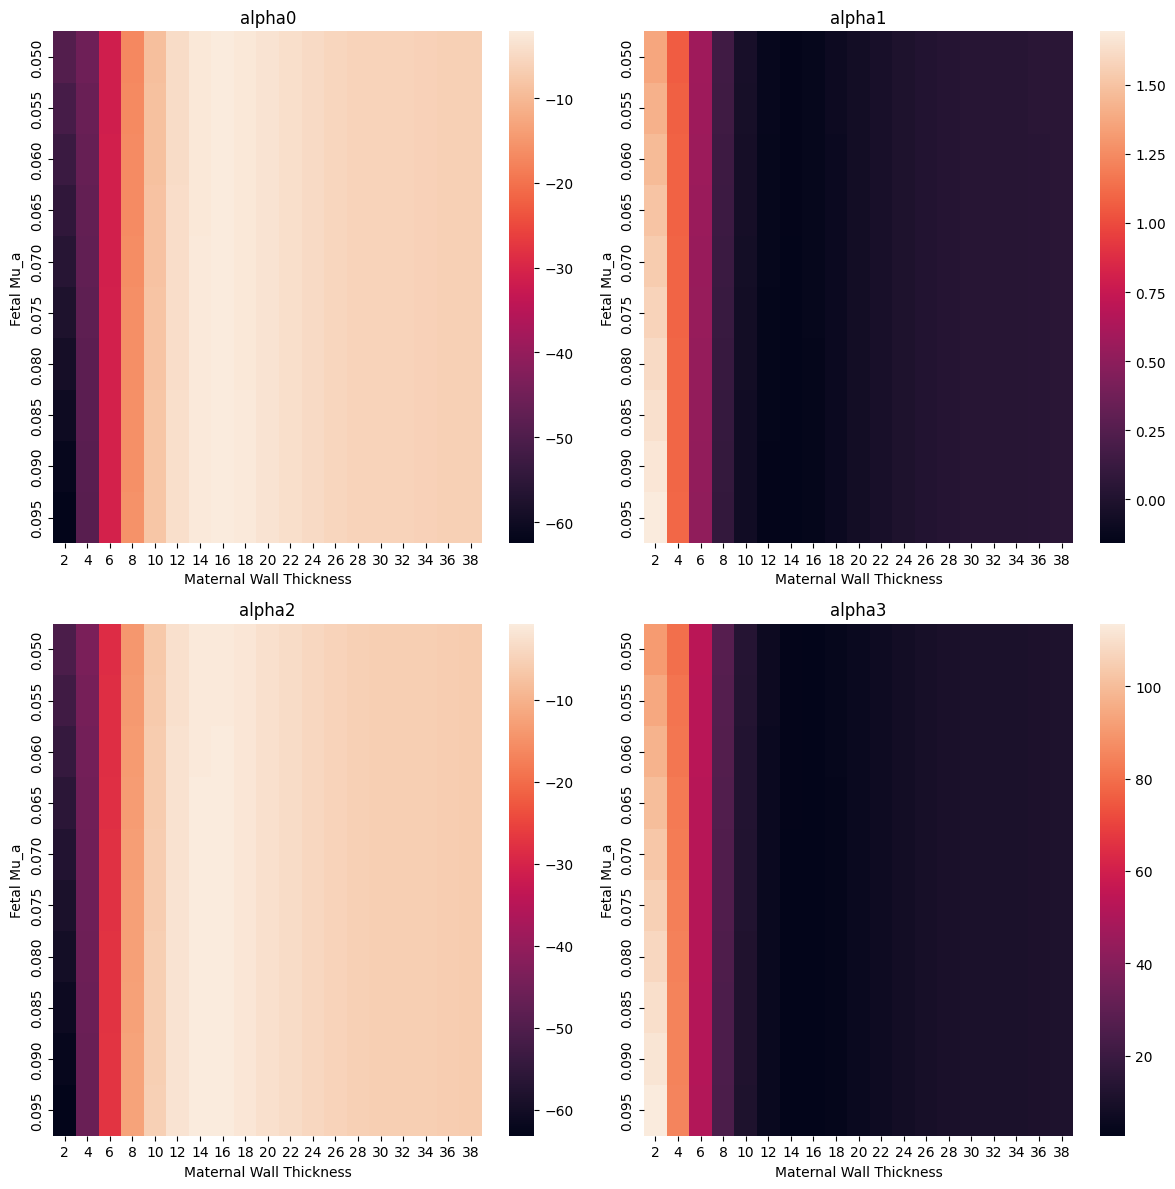

In [12]:
selected_data = fitting_param_table[(fitting_param_table['Wave Int'] == 1.0) & (fitting_param_table['Uterus Thickness'] == 5.0) & (fitting_param_table['Maternal Mu_a'] == 0.005)]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for index, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    heatmap = selected_data[['Fetal Mu_a', 'Maternal Wall Thickness', f'alpha{index}']].pivot('Fetal Mu_a', 'Maternal Wall Thickness', f'alpha{index}')
    sns.heatmap(heatmap, xticklabels=[f'{x:0.0f}' for x in heatmap.columns], yticklabels=[f'{x:0.3f}' for x in heatmap.index])
    ax.set_title(f'alpha{index}')
    # sns.lineplot(data=selected_data, x='Fetal Mu_a', y=f'alpha{index}', hue='Maternal Mu_a', marker="o")
plt.tight_layout()

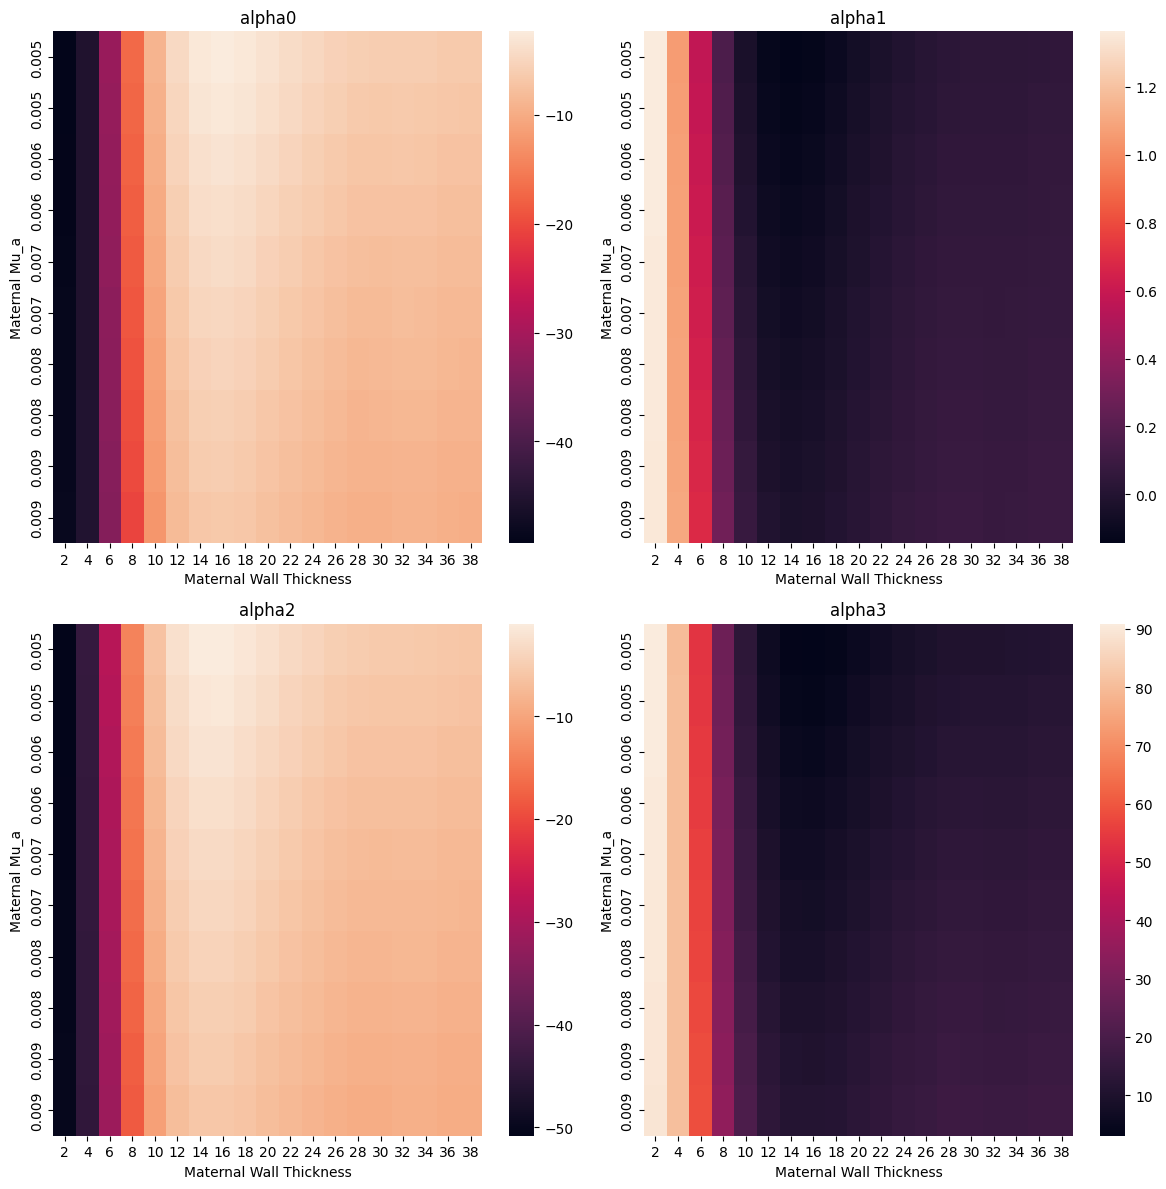

In [13]:
selected_data = fitting_param_table[(fitting_param_table['Wave Int'] == 1.0) & (fitting_param_table['Uterus Thickness'] == 5.0) & (fitting_param_table['Fetal Mu_a'] == 0.05)]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for index, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    heatmap = selected_data[['Maternal Mu_a', 'Maternal Wall Thickness', f'alpha{index}']].pivot('Maternal Mu_a', 'Maternal Wall Thickness', f'alpha{index}')
    sns.heatmap(heatmap, xticklabels=[f'{x:0.0f}' for x in heatmap.columns], yticklabels=[f'{x:0.3f}' for x in heatmap.index])
    ax.set_title(f'alpha{index}')
    # sns.lineplot(data=selected_data, x='Fetal Mu_a', y=f'alpha{index}', hue='Maternal Mu_a', marker="o")
plt.tight_layout()

# Changes in Fitting Parameter with Degrees of Freedom(Wavelength 2)

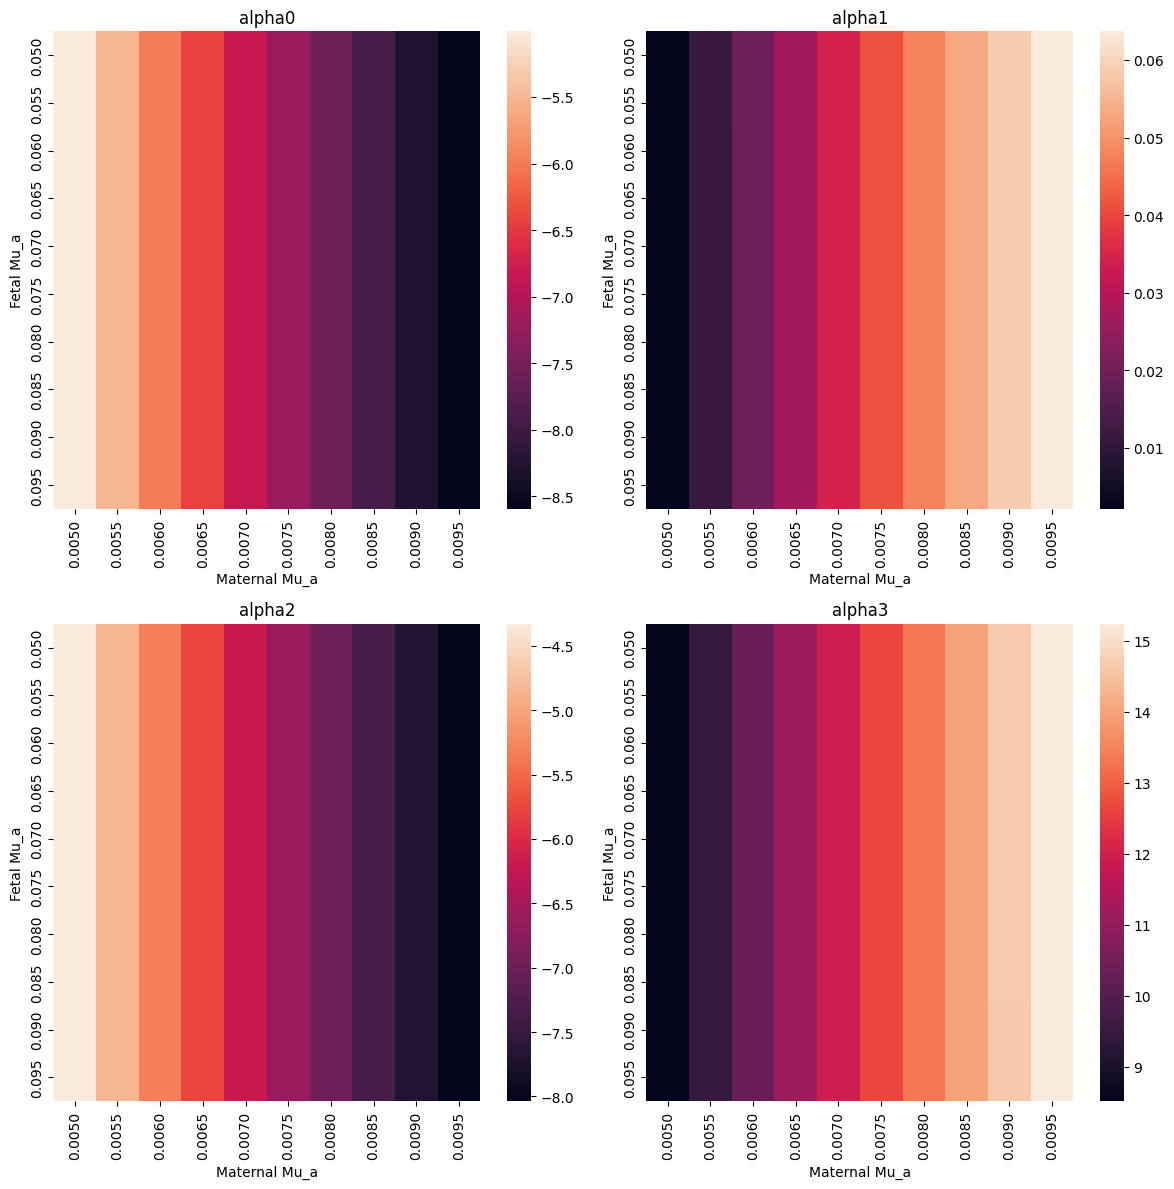

In [14]:
selected_data = fitting_param_table[(fitting_param_table['Wave Int'] == 2.0) & (fitting_param_table['Maternal Wall Thickness'] == 28.0) & (fitting_param_table['Uterus Thickness'] == 5.0)]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


for index, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    heatmap = selected_data[['Fetal Mu_a', 'Maternal Mu_a', f'alpha{index}']].pivot('Fetal Mu_a', 'Maternal Mu_a', f'alpha{index}')
    sns.heatmap(heatmap, xticklabels=[f'{x:0.4f}' for x in heatmap.columns], yticklabels=[f'{x:0.3f}' for x in heatmap.index])
    ax.set_title(f'alpha{index}')
    # sns.lineplot(data=selected_data, x='Fetal Mu_a', y=f'alpha{index}', hue='Maternal Mu_a', marker="o")
plt.tight_layout()

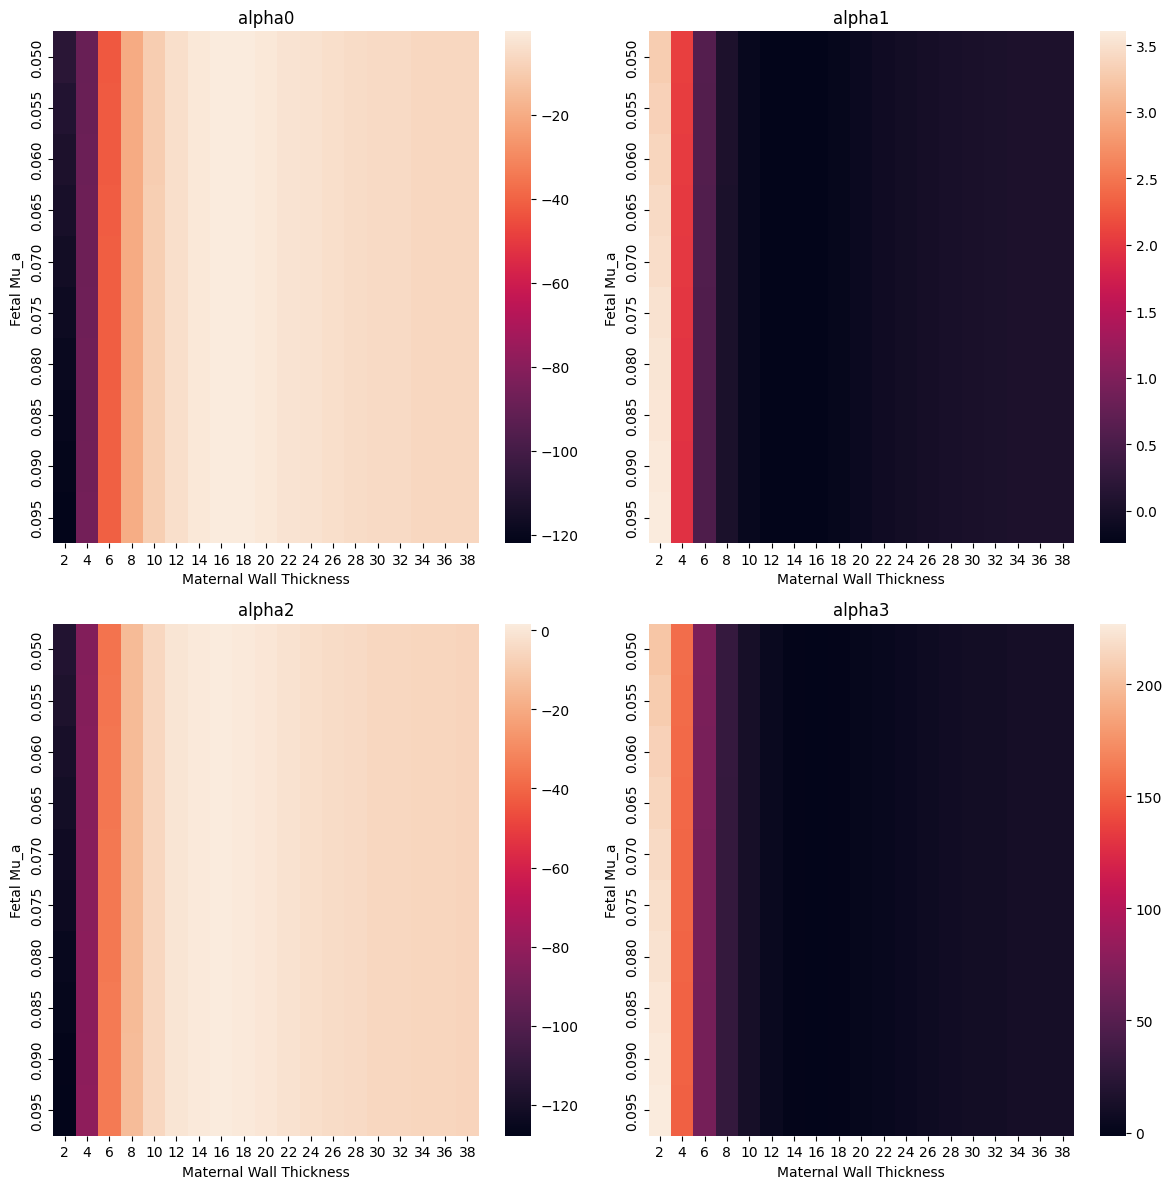

In [15]:
selected_data = fitting_param_table[(fitting_param_table['Wave Int'] == 2.0) & (fitting_param_table['Uterus Thickness'] == 5.0) & (fitting_param_table['Maternal Mu_a'] == 0.005)]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for index, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    heatmap = selected_data[['Fetal Mu_a', 'Maternal Wall Thickness', f'alpha{index}']].pivot('Fetal Mu_a', 'Maternal Wall Thickness', f'alpha{index}')
    sns.heatmap(heatmap, xticklabels=[f'{x:0.0f}' for x in heatmap.columns], yticklabels=[f'{x:0.3f}' for x in heatmap.index])
    ax.set_title(f'alpha{index}')
    # sns.lineplot(data=selected_data, x='Fetal Mu_a', y=f'alpha{index}', hue='Maternal Mu_a', marker="o")
plt.tight_layout()

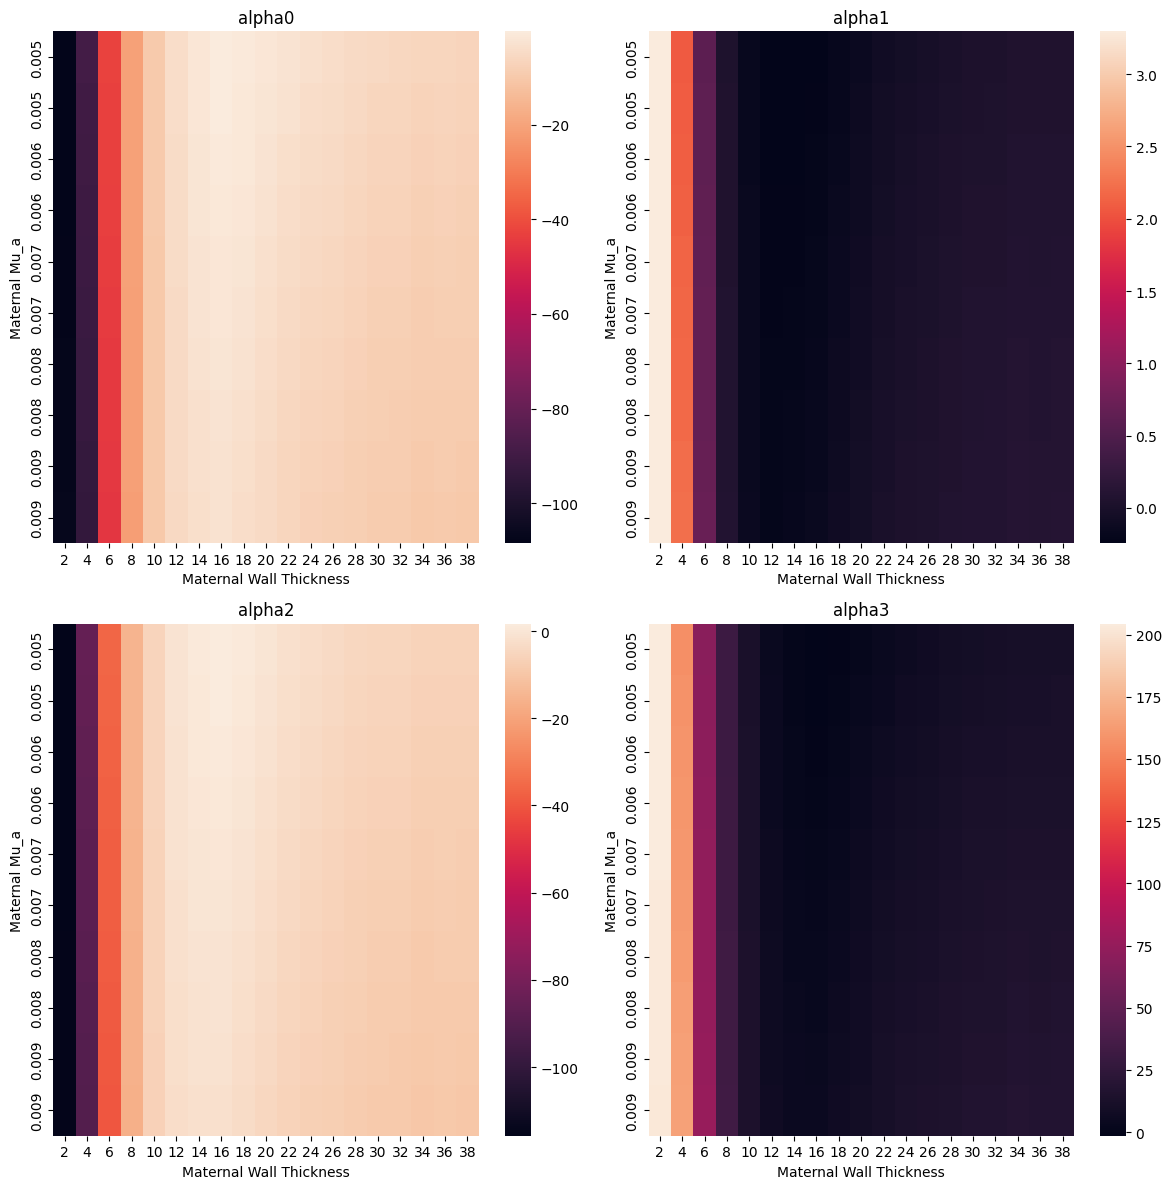

In [16]:
selected_data = fitting_param_table[(fitting_param_table['Wave Int'] == 2.0) & (fitting_param_table['Uterus Thickness'] == 5.0) & (fitting_param_table['Fetal Mu_a'] == 0.05)]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for index, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    heatmap = selected_data[['Maternal Mu_a', 'Maternal Wall Thickness', f'alpha{index}']].pivot('Maternal Mu_a', 'Maternal Wall Thickness', f'alpha{index}')
    sns.heatmap(heatmap, xticklabels=[f'{x:0.0f}' for x in heatmap.columns], yticklabels=[f'{x:0.3f}' for x in heatmap.index])
    ax.set_title(f'alpha{index}')
    # sns.lineplot(data=selected_data, x='Fetal Mu_a', y=f'alpha{index}', hue='Maternal Mu_a', marker="o")
plt.tight_layout()